In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ChinaUnicom=pd.read_csv('ChinaUnicom.csv')
ChinaUnicom.index=ChinaUnicom.iloc[:,1]
ChinaUnicom.index=pd.to_datetime(ChinaUnicom.index, format='%Y-%m-%d')
ChinaUnicom=ChinaUnicom.iloc[:,2:]

In [3]:
ChinaUnicom

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.31,7.32,7.13,7.14,159457000.0
2010-01-05,7.16,7.40,7.06,7.39,269085200.0
2010-01-06,7.35,7.42,7.21,7.23,149647400.0
2010-01-07,7.22,7.27,7.00,7.02,169879700.0
2010-01-08,7.00,7.14,6.98,7.11,113754100.0
...,...,...,...,...,...
2013-12-25,3.22,3.23,3.19,3.22,41163600.0
2013-12-26,3.21,3.22,3.16,3.17,39087100.0
2013-12-27,3.17,3.21,3.16,3.20,48991100.0


In [4]:
Close=ChinaUnicom.Close
High=ChinaUnicom.High
Low=ChinaUnicom.Low

In [5]:
upboundDC=pd.Series(0.0,index=Close.index)
downboundDC=pd.Series(0.0,index=Close.index)
midboundDC=pd.Series(0.0,index=Close.index)

In [6]:
for i in range(20,len(Close)):
    upboundDC[i]=max(High[(i-20):i])
    downboundDC[i]=min(Low[(i-20):i])
    midboundDC[i]=0.5*(upboundDC[i]+downboundDC[i])

In [7]:
upboundDC=upboundDC[20:]
downboundDC=downboundDC[20:]
midboundDC= midboundDC[20:]

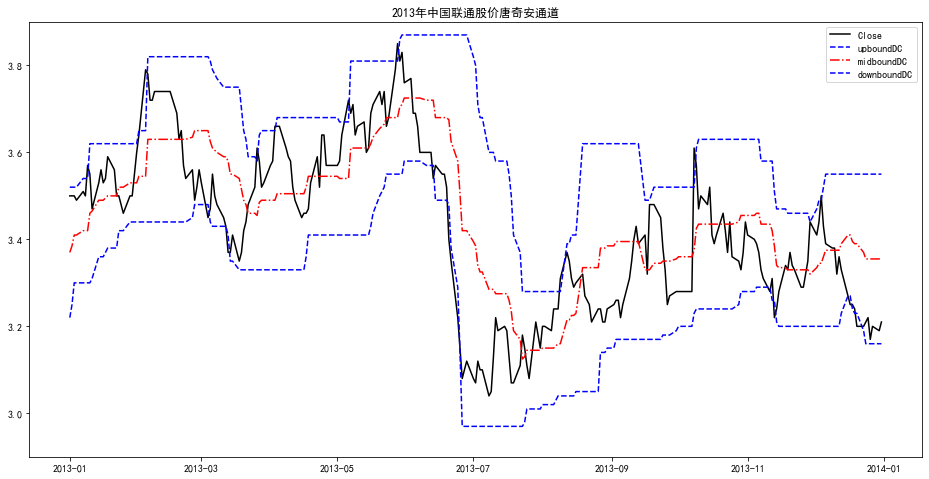

In [8]:
fig = plt.figure(figsize=(16, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close['2013'],label="Close",color='k')
plt.plot(upboundDC['2013'],label="upboundDC",color='b',linestyle='dashed')
plt.plot(midboundDC['2013'],label="midboundDC",color='r',linestyle='-.')
plt.plot(downboundDC['2013'],label="downboundDC",color='b',linestyle='dashed')
plt.title("2013年中国联通股价唐奇安通道")
plt.ylim(2.9,3.9)
plt.legend()

In [11]:
upDownDC=pd.DataFrame({'upboundDC':upboundDC,\
                      'downboundDC':downboundDC})
ChinaUnicom13=ChinaUnicom['2013-01-01':'2013-06-28']
upDownDC13=upDownDC['2013-01-01':'2013-06-28']

D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


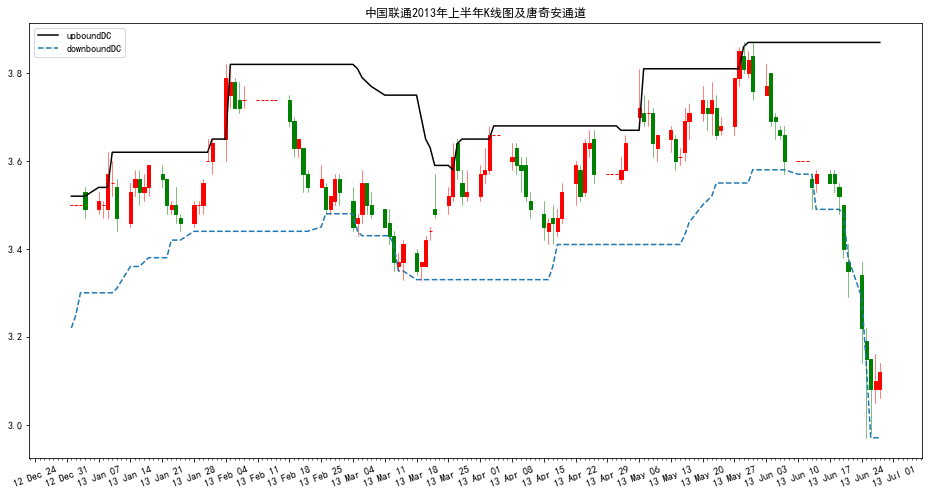

In [12]:
import candle
fig = plt.figure(figsize=(16, 8))
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='中国联通2013年上半年K线图及唐奇安通道',\
        Data=upDownDC13)

In [13]:
def upbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

def downbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]<tsRefLine[i],tsLine[i-1]>tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

In [17]:
#DC Strategy
UpBreak=upbreak(Close[upboundDC.index[0]:],upboundDC)
DownBreak=downbreak(Close[downboundDC.index[0]:],\
          downboundDC)
BreakSig=UpBreak-DownBreak

tradeSig=BreakSig.shift(1)
ret=Close/Close.shift(1)-1
tradeRet=(ret*tradeSig).dropna()
tradeRet[tradeRet==-0]=0
winRate=len(tradeRet[tradeRet>0]\
            )/len(tradeRet[tradeRet!=0])

In [18]:
winRate

0.45614035087719296

In [16]:
#40日DC
upboundDC2=pd.Series(0.0,index=Close.index)
downboundDC2=pd.Series(0.0,index=Close.index)
midboundDC2=pd.Series(0.0,index=Close.index)

In [19]:

for i in range(40,len(Close)):
    upboundDC2[i]=max(High[(i-40):i])
    downboundDC2[i]=min(Low[(i-40):i])
    midboundDC2[i]=0.5*(upboundDC2[i]+downboundDC2[i])

In [20]:

upboundDC2=upboundDC2[40:]
downboundDC2=downboundDC2[40:]
midboundDC2= midboundDC2[40:]

In [21]:
upDownDC2=pd.DataFrame({'upboundDC':upboundDC2,\
                      'downboundDC':downboundDC2})
ChinaUnicom13=ChinaUnicom['2013-01-01':'2013-06-28']
upDownDC2=upDownDC2['2013-01-01':'2013-06-28']

D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


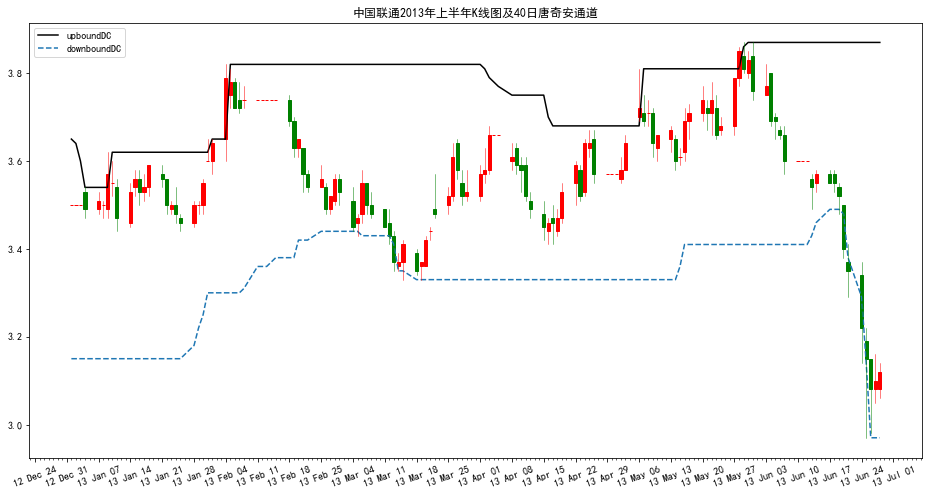

In [22]:
fig = plt.figure(figsize=(16, 8))
import candle
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='中国联通2013年上半年K线图及40日唐奇安通道',\
        Data=upDownDC2)

In [23]:
UpBreak2=upbreak(Close[upboundDC2.index[0]:],upboundDC2)
DownBreak2=downbreak(Close[downboundDC2.index[0]:],downboundDC2)
BreakSig2=UpBreak2-DownBreak2
tradeSig2=BreakSig2.shift(1)
tradeRet2=(ret*tradeSig2).dropna()
tradeRet2[tradeRet2==0]=0
winRate2=len(tradeRet2[tradeRet2>0]\
         )/len(tradeRet2[tradeRet2!=0])

In [24]:
winRate2

0.5